Found 1 GPU(s)
#0 GPU memory is allocated
Found 376 images belonging to 3 classes.
Found 54 images belonging to 3 classes.
Found 26 images belonging to 3 classes.


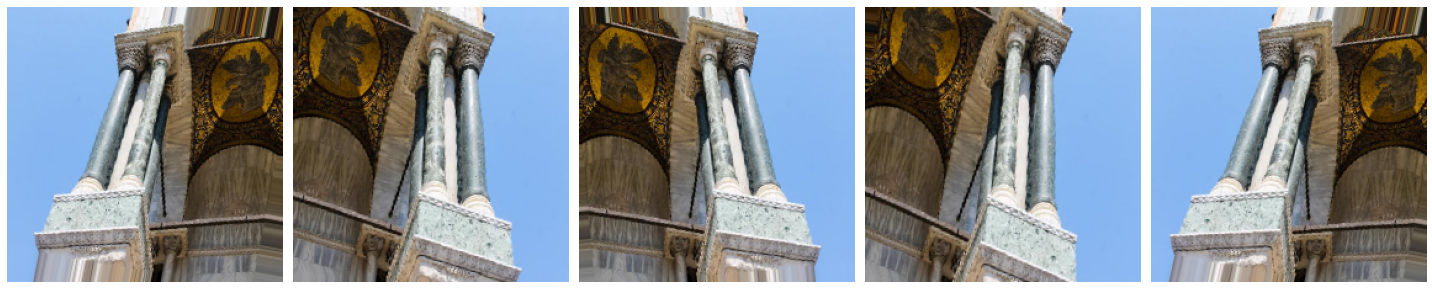

/home/chenhsi/anaconda3/envs/py36/lib/python3.6/site-packages/vit_keras/utils.py:79: UserWarning: Resizing position embeddings from 12 to 7
  UserWarning,
31
[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb2f83c9278>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb2f82b4400>, <tensorflow.python.keras.layers.core.Reshape object at 0x7fb2f82b4f60>, <vit_keras.layers.ClassToken object at 0x7fb2f81d03c8>, <vit_keras.layers.AddPositionEmbs object at 0x7fb2f81d94e0>, <vit_keras.layers.TransformerBlock object at 0x7fb2f81d9eb8>, <vit_keras.layers.TransformerBlock object at 0x7fb3249575c0>, <vit_keras.layers.TransformerBlock object at 0x7fb31b12c0b8>, <vit_keras.layers.TransformerBlock object at 0x7fb31b145320>, <vit_keras.layers.TransformerBlock object at 0x7fb2f837fef0>, <vit_keras.layers.TransformerBlock object at 0x7fb2f8148940>, <vit_keras.layers.TransformerBlock object at 0x7fb2f80ea898>, <vit_keras.layers.TransformerBlock object at 0x7fb318041

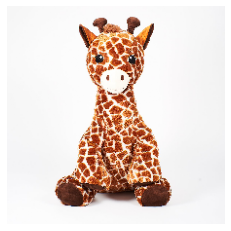

/home/chenhsi/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
this is:  animals


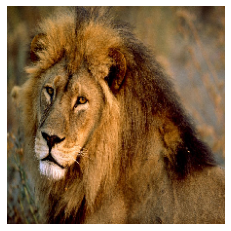

this is:  animals


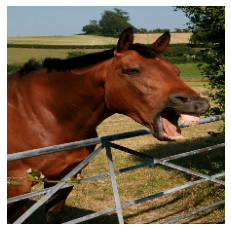

this is:  animals


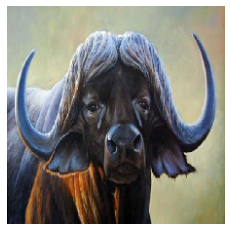

this is:  animals


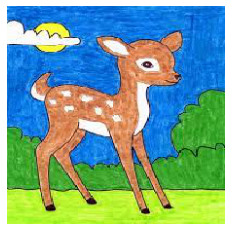

this is:  animals


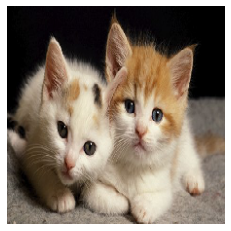

this is:  animals


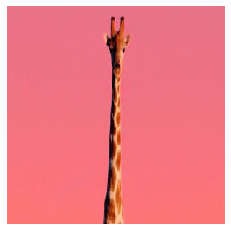

this is:  animals


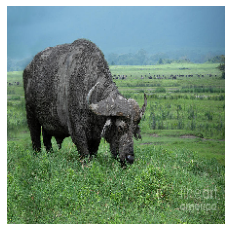

this is:  animals


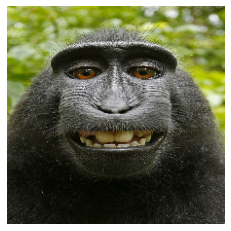

this is:  animals


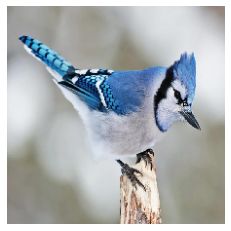

this is:  animals


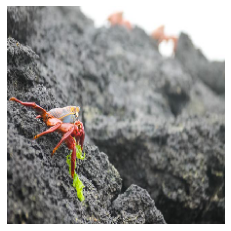

this is:  animals


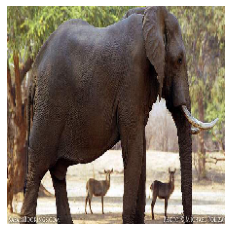

this is:  animals


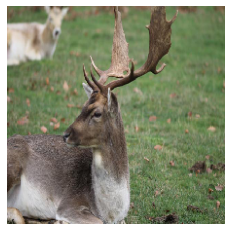

this is:  animals


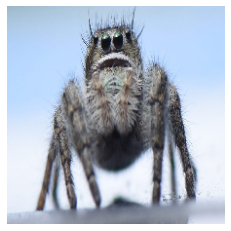

this is:  animals


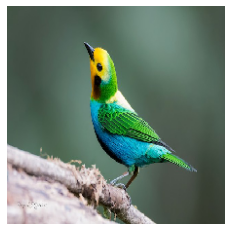

this is:  animals


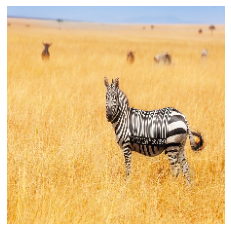

this is:  animals


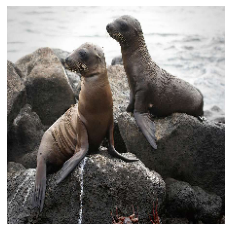

this is:  animals


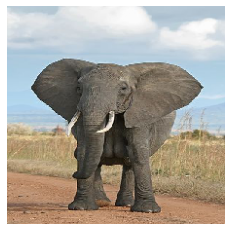

this is:  animals
this folder:  /home/chenhsi/Projects/Xihelm/input/test/buildings


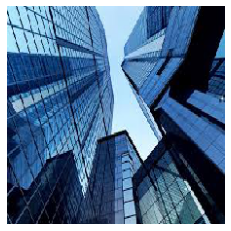

this is:  buildings


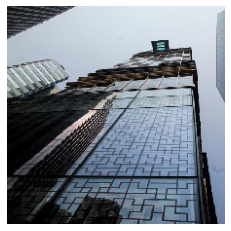

this is:  buildings
this folder:  /home/chenhsi/Projects/Xihelm/input/test/landscapes


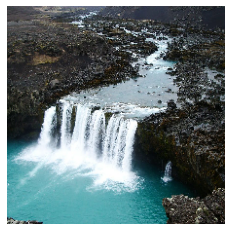

this is:  landscapes


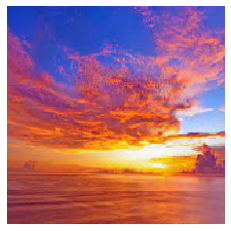

this is:  landscapes


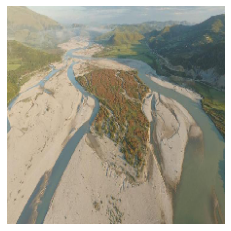

this is:  landscapes


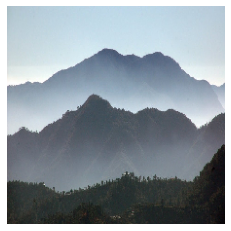

this is:  landscapes


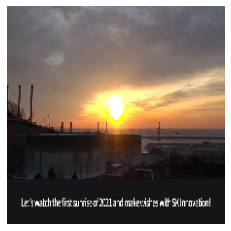

this is:  landscapes


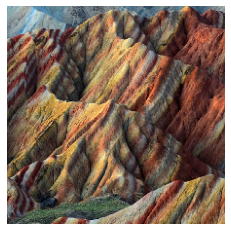

this is:  landscapes


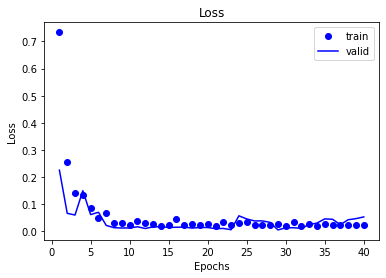

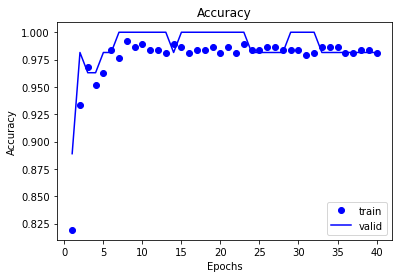

best val_acc: 1.0 epoch: 6
best val_loss: 0.005013274494558573 epoch: 28
7/7 [==============================] - 1s 55ms/step - loss: 2.0966e-04 - accuracy: 1.0000
Test Accuracy: 1.0
==end==


In [1]:
breakpoint()
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GaussianNoise, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.python.client import device_lib
from vit_keras import vit
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
TEST_SIZE = 224
groups={
    # 0:"birds",
    # 1:"buffalo",
    # 2:"buildings",
    # 3:"cats",
    # 4:"deers",
    # 5:"elephants",
    # 6:"girafe",
    # 7:"horses",
    # 8:"insects",
    # 9:"mountains",
    # 10:"others",
    # 11:"rivers",
    # 12:"skys"
    0:"animals",
    1:"buildings",
    2:"landscapes"
}
class Utility():
    def __init__(self):
        self.config = ConfigProto()
        self.config.gpu_options.allow_growth = True
        self.session = InteractiveSession(config=self.config)

    def allocate_gpu_memory(self, gpu_number=0):
        physical_devices = tf.config.experimental.list_physical_devices('GPU')

        if physical_devices:
            try:
                print("Found {} GPU(s)".format(len(physical_devices)))
                tf.config.set_visible_devices(physical_devices[gpu_number], 'GPU')
                tf.config.experimental.set_memory_growth(physical_devices[gpu_number], True)
                print("#{} GPU memory is allocated".format(gpu_number))
            except RuntimeError as e:
                print(e)
        else:
            print("Not enough GPU hardware devices available")


class ThreeGroupsClassfier():
    def __init__(self):
        self.train_path = "input/train"
        self.valid_path = "input/valid"
        self.test_path = "input/test"

    def DataAugment(self):
        # Data augmentation
        train_datagen = ImageDataGenerator(
            rescale=1/255,
            horizontal_flip=True,
            rotation_range=15,
            zoom_range=0.1
        )
        valid_datagen = ImageDataGenerator(rescale=1/255)
        test_datagen = ImageDataGenerator(rescale=1/255)
        # folders=[
        #     '/home/chenhsi/Projects/Xihelm/input/train/animals'
        #     # '/home/chenhsi/Projects/Xihelm/input/train/buildings',
        #     # '/home/chenhsi/Projects/Xihelm/input/train/landscapes'
        # ]
        # for folder in folders:
        #     for imgFile in os.listdir(folder):
        #         if imgFile=='preview':
        #             print("pass")
        #             continue
        #         imaPath = folder+"/"+imgFile
        #         img=load_img(imaPath)
        #         x=img_to_array(img)
        #         x=x.reshape((1,)+x.shape)
        #         i=0
        #         saveDir = folder+'/'+"preview"
        #         filePrefix,_=os.path.splitext(imgFile)
        #         for batch in train_datagen.flow(x,batch_size=1,
        #                                         save_to_dir=saveDir,
        #                                         save_prefix=filePrefix,
        #                                         save_format='jpg'):
        #             if i>=19:
        #                 break
        #             i+=1
        train_generator = train_datagen.flow_from_directory(
            self.train_path,
            target_size=(TEST_SIZE, TEST_SIZE),
            batch_size=4,
            color_mode='rgb',
            class_mode='sparse',
            shuffle=True
        )

        validation_generator = valid_datagen.flow_from_directory(
            self.valid_path,
            target_size=(TEST_SIZE, TEST_SIZE),
            batch_size=4,
            color_mode='rgb',
            class_mode='sparse')

        test_generator = test_datagen.flow_from_directory(
            self.test_path,
            target_size=(TEST_SIZE, TEST_SIZE),
            batch_size=4,
            color_mode='rgb',
            class_mode='sparse')
        return train_generator, validation_generator, test_generator

    def plotImages(self,images_arr):
        fig, axes = plt.subplots(1, 5, figsize=(20,20))
        axes = axes.flatten()
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis('off')
        plt.tight_layout()
        plt.show()
    
# augmented_images = [train_generator[0][0][0] for i in range(5)]
# plotImages(augmented_images)
    def Start(self, train_generator, validation_generator, test_generator):
        backend.clear_session()
        vit_model = vit.vit_l32(
            image_size=TEST_SIZE,
            pretrained=True,
            include_top=False,
            pretrained_top=False
        )

        print(len(vit_model.layers))
        print(vit_model.layers)

        # Decay lr for each 7 epochs
        def scheduler(epoch: int, lr: float) -> float:
            if epoch != 0 and epoch % 7 == 0:
                return lr * 0.1
            else:
                return lr
        lr_scheduler_callback = LearningRateScheduler(scheduler)
        reduceLr = ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=2,
            verbose=1,
            mode='max',
            min_lr=0.0001)
        filepath="model_{epoch:02d}-{val_loss:.2f}.hdf5"
        save_dir = "/home/chenhsi/Projects/Xihelm/models"
        checkpoint = ModelCheckpoint(os.path.join(save_dir, filepath), 
                                        monitor='val_loss',#val_loss
                                        verbose=1,
                                        save_best_only=False, 
                                        save_weights_only=False)

        finetune_at = 28
        # fine-tuning
        for layer in vit_model.layers[:finetune_at - 1]:
            layer.trainable = False
        num_classes = len(validation_generator.class_indices)
        # Add GaussianNoise layer for robustness
        noise = GaussianNoise(0.01, input_shape=(TEST_SIZE, TEST_SIZE, 3))
        # Classification head
        head = Dense(num_classes, activation="softmax")
        model = Sequential()
        model.add(noise)
        model.add(vit_model)
        model.add(head)
        model.compile(optimizer=optimizers.Adam(),
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])                      
        history = model.fit(
                train_generator,
                epochs=40,
                validation_data=validation_generator,
                verbose=1, 
                shuffle=True,
                callbacks=[
                    # EarlyStopping(monitor="val_accuracy", 
                    # patience=10, 
                    # restore_best_weights=True),
                    # lr_scheduler_callback
                    reduceLr,
                    checkpoint
                ]
                # callbacks=None
                )
        #save model
        from tensorflow import keras
        # model.save('/home/chenhsi/Projects/Xihelm/myModel.h5')
        # model.save_weights('/home/chenhsi/Projects/Xihelm/myModel_weights.h5')
        # modelSave=keras.models.load_model('/home/chenhsi/Projects/Xihelm/models/myModel')
        # model.load_weights('/home/chenhsi/Projects/Xihelm/models/model_02-0.96.hdf5')
        def LoadImg(imgPath, show=True):
            img=load_img(imgPath,target_size=(TEST_SIZE,TEST_SIZE))
            imgTensor=img_to_array(img)
            imgTensor=np.expand_dims(imgTensor,axis=0)
            imgTensor /=255
            if show:
                plt.imshow(imgTensor[0])
                plt.axis('off')
                plt.show()

            return imgTensor

        #prediction
        folders=[
            # '/home/chenhsi/Projects/Xihelm/input/test/birds',
            # '/home/chenhsi/Projects/Xihelm/input/test/buffalo',
            # '/home/chenhsi/Projects/Xihelm/input/test/buildings',
            # '/home/chenhsi/Projects/Xihelm/input/test/cats',
            # '/home/chenhsi/Projects/Xihelm/input/test/deers',
            # '/home/chenhsi/Projects/Xihelm/input/test/elephants',
            # '/home/chenhsi/Projects/Xihelm/input/test/girafe',
            # '/home/chenhsi/Projects/Xihelm/input/test/horses',
            # '/home/chenhsi/Projects/Xihelm/input/test/insects',
            # '/home/chenhsi/Projects/Xihelm/input/test/mountains',
            # '/home/chenhsi/Projects/Xihelm/input/test/others',
            # '/home/chenhsi/Projects/Xihelm/input/test/rivers',
            # '/home/chenhsi/Projects/Xihelm/input/test/skys',

            '/home/chenhsi/Projects/Xihelm/input/test/animals',
            '/home/chenhsi/Projects/Xihelm/input/test/buildings',
            '/home/chenhsi/Projects/Xihelm/input/test/landscapes'
        ]
        for folder in folders:
            print("this folder: ",folder)
            for imgFile in os.listdir(folder):
                img = folder+"/"+imgFile
                imgTensor=LoadImg(img)
                pred=model.predict(imgTensor)
                classes = model.predict_classes(imgTensor)
                # print(pred)
                # print(classes)
                print("this is: ",groups[classes[0]])
        history_dict = history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        acc_values = history_dict["accuracy"]
        val_acc_values = history_dict["val_accuracy"]
        epochs = range(1, len(history_dict["accuracy"]) + 1)

        plt.plot(epochs, loss_values, "bo", label="train")
        plt.plot(epochs, val_loss_values, "b", label="valid")
        plt.title("Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        plt.plot(epochs, acc_values, "bo", label="train")
        plt.plot(epochs, val_acc_values, "b", label="valid")
        plt.title("Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

        print("best val_acc:", np.max(val_acc_values), "epoch:", np.argmax(val_acc_values))
        print("best val_loss:", np.min(val_loss_values), "epoch:", np.argmin(val_loss_values))
        test_loss, test_acc = model.evaluate(test_generator)
        print("Test Accuracy:", test_acc)
        print("==end==")


if __name__ == "__main__":
    util = Utility()
    util.allocate_gpu_memory()
    device_lib.list_local_devices()
    classfier=ThreeGroupsClassfier()
    train_generator, validation_generator, test_generator = classfier.DataAugment()
    augmented_images = [train_generator[0][0][0] for i in range(5)]
    classfier.plotImages(augmented_images)
    classfier.Start(train_generator, validation_generator, test_generator)
